# $$f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$$
# $$f(x, y) = \frac{1}{r + 1}$$
## where r =$3^{-x^2 - y^2}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import log
from sympy import symbols, diff
from matplotlib import cm 
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [2]:
def f(x,y):
    r = 3**(-x**2 - y**2)
    return 1/(r+1)

In [3]:
x_2 = np.linspace(start=-2, stop=2, num=200)
y_2 = np.linspace(start=-2, stop=2, num=200)

In [4]:
print('the shape of x_2 is', x_2.shape)

the shape of x_2 is (200,)


In [5]:
type(x_2)

numpy.ndarray

In [6]:
x_2

array([-2.        , -1.9798995 , -1.95979899, -1.93969849, -1.91959799,
       -1.89949749, -1.87939698, -1.85929648, -1.83919598, -1.81909548,
       -1.79899497, -1.77889447, -1.75879397, -1.73869347, -1.71859296,
       -1.69849246, -1.67839196, -1.65829146, -1.63819095, -1.61809045,
       -1.59798995, -1.57788945, -1.55778894, -1.53768844, -1.51758794,
       -1.49748744, -1.47738693, -1.45728643, -1.43718593, -1.41708543,
       -1.39698492, -1.37688442, -1.35678392, -1.33668342, -1.31658291,
       -1.29648241, -1.27638191, -1.25628141, -1.2361809 , -1.2160804 ,
       -1.1959799 , -1.1758794 , -1.15577889, -1.13567839, -1.11557789,
       -1.09547739, -1.07537688, -1.05527638, -1.03517588, -1.01507538,
       -0.99497487, -0.97487437, -0.95477387, -0.93467337, -0.91457286,
       -0.89447236, -0.87437186, -0.85427136, -0.83417085, -0.81407035,
       -0.79396985, -0.77386935, -0.75376884, -0.73366834, -0.71356784,
       -0.69346734, -0.67336683, -0.65326633, -0.63316583, -0.61

In [7]:
x_2, y_2 = np.meshgrid(x_2, y_2)
print('Array after meshgrid: ', x_2.shape)

Array after meshgrid:  (200, 200)


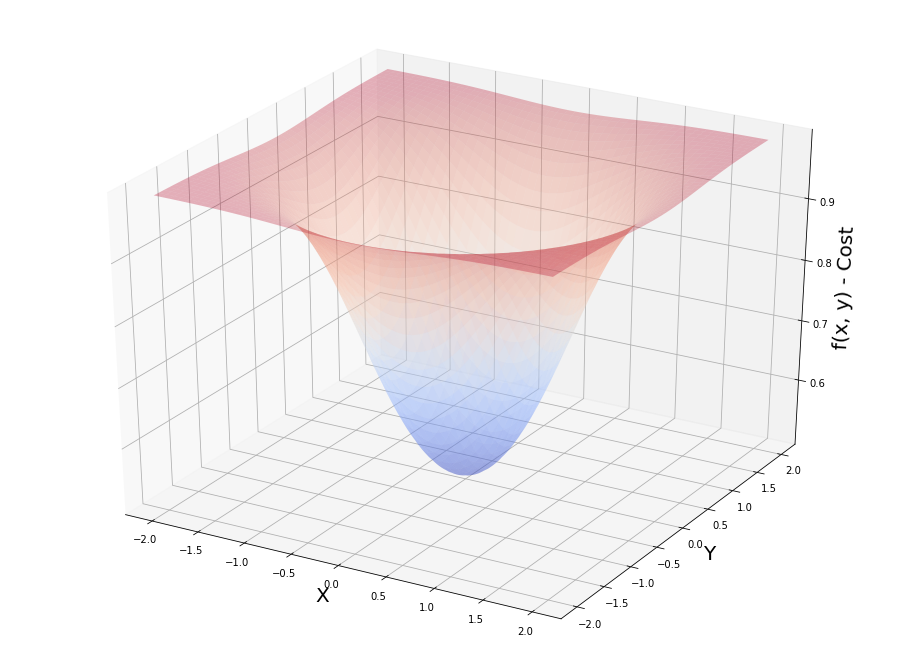

In [8]:
fig = plt.figure(figsize = (16,12))
ax = fig.gca(projection = '3d')
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)
ax.plot_surface(x_2, y_2, f(x_2,y_2), cmap = cm.coolwarm, alpha = 0.3)
plt.show()

# Partial Derivatives & Symbolic Computation
# $$\frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2 - y^2}}{\left( 3^{-x^2 - y^2} + 1 \right) ^2}$$
# $$\frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3^{-x^2 - y^2}}{\left( 3^{-x^2 - y^2} + 1 \right) ^2}$$

In [9]:
a, b = symbols('x, y')
print('Our  f(x, y) is                   : ', f(a, b))
print('PD wrt x is                       : ', diff(f(a, b), a))
print('PD wrt y is                       : ', diff(f(a, b), b))

Our  f(x, y) is                   :  1/(3**(-x**2 - y**2) + 1)
PD wrt x is                       :  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
PD wrt y is                       :  2*3**(-x**2 - y**2)*y*log(3)/(3**(-x**2 - y**2) + 1)**2


In [10]:
print('Value of f(x,y) at x=1.8 y=1.0 is : ', f(a, b).evalf(subs={a:1.8, b:1.0}))
print('Value of PD wrt x                 : ', diff(f(a, b), a).evalf(subs={a:1.8, b:1.0}))

Value of f(x,y) at x=1.8 y=1.0 is :  0.990604794032582
Value of PD wrt x                 :  0.0368089716197505


# Gradient Descent using Sympy

In [11]:
params = np.array([1.8, 1.0])
multiplier = 0.1 
max_iter = 500

for n in range(max_iter):
    
    gradient_x = diff(f(a,b),a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a,b),b).evalf(subs={a:params[0], b:params[1]})
    gradients  = np.array([gradient_x, gradient_y])
    params     = params - multiplier * gradients 
    
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of:  3.45838599885832e-11
Minimum occurs at y value of:  1.92132555492129e-11
The cost is:  0.500000000000000


# Gradient descent without sympy

In [12]:
def fpx(x,y):
    r = 3**(-x**2-y**2)
    return 2*x*log(3)*r / (r +1)**2

In [13]:
def fpy(x,y):
    r = 3**(-x**2-y**2)
    return 2*y*log(3)*r / (r +1)**2

In [14]:
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0])

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients  = np.array([gradient_x, gradient_y])
    params     = params - multiplier * gradients 
    
# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of:  3.458385998858304e-11
Minimum occurs at y value of:  1.9213255549212797e-11
The cost is:  0.5


In [15]:
multiplier = .1
max_iter = 500
params = np.array([1.8, 1])
values_array = params.reshape(1,2)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
    values_array = np.append(values_array, params.reshape(1, 2), axis=0)
    
print('shape of the params array', params.shape, '\n')
print('shape of the values array', values_array.shape,'\n')
print('The final values in the params array',params, '\n')
print('The values array',values_array,'\n')
print('Values in gradient array', gradients, '\n')
print('Minimum occurs at x value of: ', params[0], '\n')
print('Minimum occurs at y value of: ', params[1], '\n')
print('The cost is: ', f(params[0], params[1]), '\n')

shape of the params array (2,) 

shape of the values array (501, 2) 

The final values in the params array [3.45838600e-11 1.92132555e-11] 

The values array [[1.80000000e+00 1.00000000e+00]
 [1.79631910e+00 9.97955057e-01]
 [1.79257650e+00 9.95875836e-01]
 ...
 [3.87209563e-11 2.15116424e-11]
 [3.65939904e-11 2.03299946e-11]
 [3.45838600e-11 1.92132555e-11]] 

Values in gradient array [2.01013038e-11 1.11673910e-11] 

Minimum occurs at x value of:  3.458385998858304e-11 

Minimum occurs at y value of:  1.9213255549212797e-11 

The cost is:  0.5 



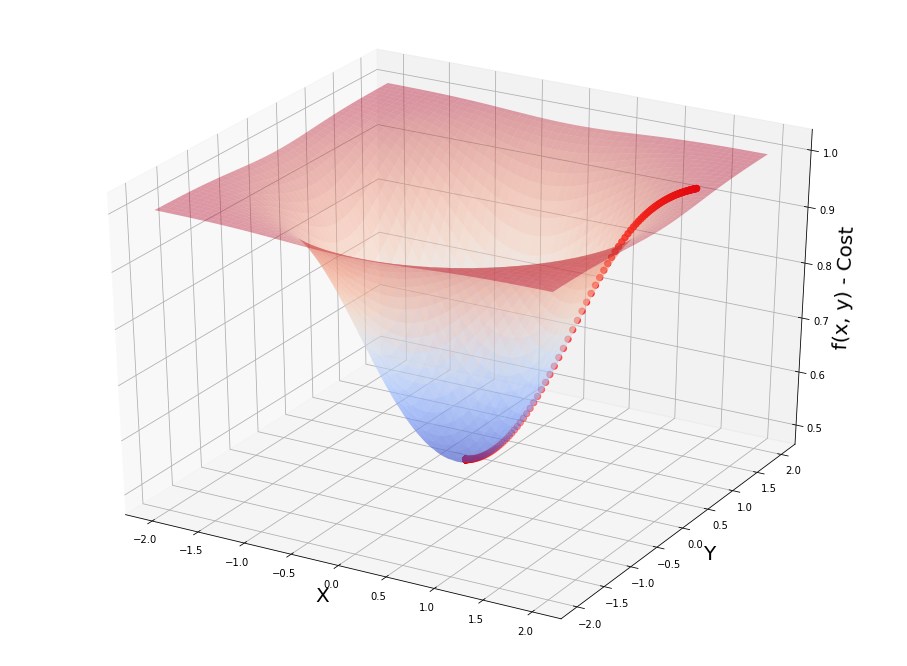

In [16]:
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)
ax.plot_surface(x_2, y_2, f(x_2, y_2), cmap=cm.coolwarm, alpha=0.4)
ax.scatter(values_array[:,0], values_array[:,1], f(values_array[:,0], values_array[:,1]), s = 40 , color = 'red')
plt.show()